# Project 1: Digit Classification with KNN and Naive Bayes

### Author: *Daniel Volk*
### Class: *W207 Fall 2017 Section 3*
### Date: *10/02/2017*

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [69]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [70]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

## Problem 1

In order to reuse the P1 function later on in the notebook I broke the problem down into a preprocessing step and a plotting step. The first function finds the subset of 10 examples of each digit and the second function plots those images.

In [71]:
def find_samples(X, y, num_examples=10):
    """This function finds equal samples of each handwritten digit
    and outputs them in a numpy array with each sample digit.
    """
    
    # Create an empty array to contain the filtered digits
    results = np.zeros((0,28*28))
    
    # Loop over each digit 0-9
    for i in range(10): 
        
        # Find examples (default=10) of each digit 0-9 and add them to results array
        results = np.append(results, X[np.where(y==i)[0][0:num_examples]], axis=0)
    
    # Return the number of digits
    return results

Now I define the P1() function that accepts an array of data and plots the sample digits.

In [72]:
def P1(data, num_examples=10):
    '''The following code loops through each digit 0-9 and plots a
    subset of size (num_examples) from the mini training data
    '''
    
    # Set the plot size to 14x14
    plt.figure(figsize=(14,14))
    
    i = 0
    
    # Plot each sample of the desired digit
    for sample in data:

        # Add to plot counter
        i+=1

        # Reshape the data from 784x1 to 28x28
        sample_image = sample.reshape(28,28)

        # Create the sub plot
        plt.subplot(10, num_examples, i)

        # Turn off the axes
        plt.axis('off')

        # plot the image in grayscale
        plt.imshow(sample_image, cmap='gray')

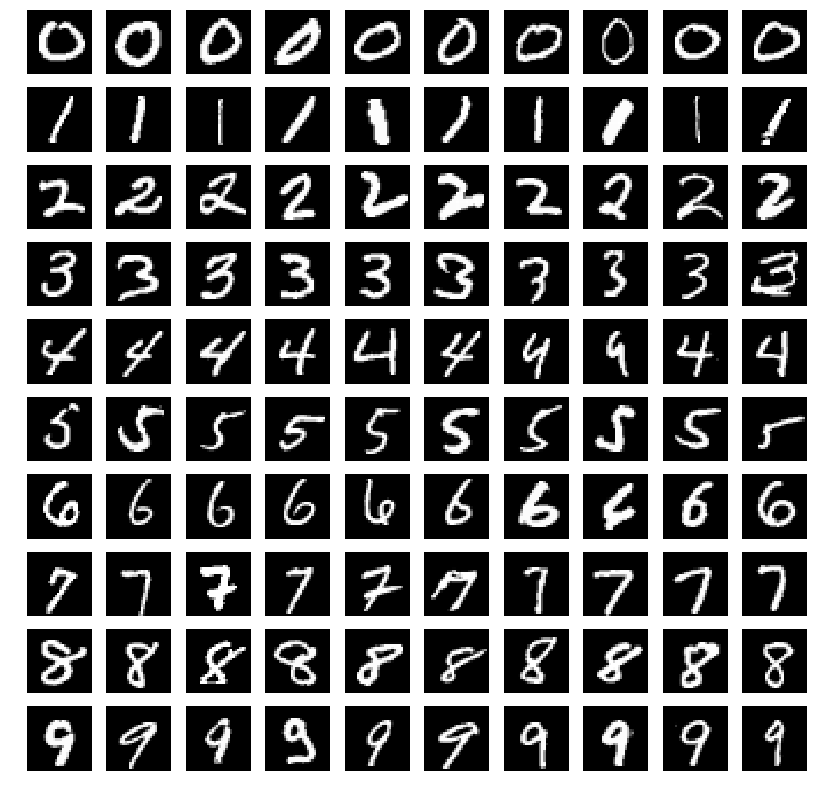

In [73]:
# Define how many samples of each digit to plot
num_examples = 10

# Preprocess the MNIST data to get 10 samples of each digit
plot_data = find_samples(mini_train_data, mini_train_labels, num_examples)

# Use the pre-processed data and plot the images
P1(plot_data, num_examples)

## Problem 2

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [74]:
def P2(k_values):
    '''This function takes a list of k-values to fit. 
    It then loops over each value, fits, predicts and 
    prints a classification report for each k value.
    '''
    
    # Iterate over values for k
    for k in k_values:
        
        # Create a KNN classifier object with neighbor value k
        clf = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the classifier using the mini train and test data
        clf.fit(mini_train_data, mini_train_labels)
        
        # Predict using the dev data 
        preds = clf.predict(dev_data)
        
        # Calculate the accuracy
        acc = 100*np.mean(preds == dev_labels)
        
        # Print the accuracy and classification report
        print "Using the {0} nearest neighbor(s) we get an accuracy of {1:.1f}%".format(k, acc)
        print
        print classification_report(dev_labels, preds)
        
# Set up a list of k-neighbor values to iterate over
k_values = [1, 3, 5, 7, 9]

# Run the code to fit and output the results for each knn
P2(k_values)

Using the 1 nearest neighbor(s) we get an accuracy of 88.8%

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Using the 3 nearest neighbor(s) we get an accuracy of 87.8%

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69    

__ANSWER:__ _The digit __9__ consistently performs worse than the other digits. It seems from the earlier plot that 9 could be confused for both 7 and 4 which might explain why the performance is so much lower._

## Problem 3

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [75]:
def P3(train_sizes, accuracies, comp_times):
    ''' Loop over the various training sizes and train a KNN
    using the specified amount of data. Record the accuracy
    and training time for each training size.
    '''
    
    # loop over the various training sizes
    for train_size in train_sizes:
        
        # Take a subset of the data and labels for the specified size
        X = train_data[0:train_size]
        y = train_labels[0:train_size]
        
        # Initiate a KNN classifier object
        clf = KNeighborsClassifier(n_neighbors=1)
        
        # Record the beginning of the training 
        start_time = time.time()
        
        # Fit the classifier model
        clf.fit(X,y)
        
        # Create predictions using the KNN classifier
        preds = clf.predict(dev_data)
        
        # Record the compute time for the training and append it to the list
        comp_time = round(time.time() - start_time,3)
        comp_times.append(comp_time)

        # Record the accuracy of the model and append it to the list
        acc = 1.0*sum(dev_labels == preds)/len(dev_labels)
        accuracies.append(acc)

        print "It took {0:.2f} secs to train with {1} samples. The KNN accuracy is {2:.1%}".format(comp_time, train_size, acc)

    return accuracies, comp_times

# Set up the list inputs for training size, accuracies and completion times
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
comp_times = []

# Run the function to test a KNN with different sample sizes
accuracies, comp_times = P3(train_sizes, accuracies, comp_times)

It took 0.32 secs to train with 100 samples. The KNN accuracy is 72.0%
It took 0.63 secs to train with 200 samples. The KNN accuracy is 78.6%
It took 1.33 secs to train with 400 samples. The KNN accuracy is 84.1%
It took 2.84 secs to train with 800 samples. The KNN accuracy is 88.4%
It took 6.61 secs to train with 1600 samples. The KNN accuracy is 90.2%
It took 11.86 secs to train with 3200 samples. The KNN accuracy is 92.6%
It took 24.75 secs to train with 6400 samples. The KNN accuracy is 93.7%
It took 44.29 secs to train with 12800 samples. The KNN accuracy is 95.9%
It took 92.13 secs to train with 25000 samples. The KNN accuracy is 97.0%


Below are plots the results for accuracy and compute time for each training sample size.

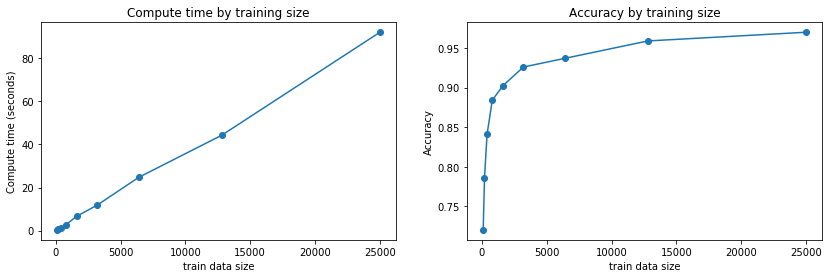

In [76]:
plt.figure(figsize=(14,4))

# Plot the compute time by train_size
plt.subplot(121)
plt.title("Compute time by training size")
plt.ylabel("Compute time (seconds)")
plt.xlabel("train data size")
plt.plot(train_sizes, comp_times, marker="o");

# Plot the accuracy by train_size
plt.subplot(122)
plt.title("Accuracy by training size")
plt.ylabel("Accuracy")
plt.xlabel("train data size")
plt.plot(train_sizes, accuracies, marker="o");

## Problem 4

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [77]:
def P4(X,y):
    """
    The following code takes the train_sizes and accuracies 
    and fits a linear regression and then a transformed linear 
    regression to it. The output is the predicted value for 
    train_size == 60000, lm prediction and transformed predictions.
    """
    # Reshape the data for use in a linear regression model
    X = np.array(X).reshape(len(X),1)
    y = np.array(y).reshape(len(y),1)
    
    # Initiate a Linear Regression object
    lm = LinearRegression()
    
    # Fit the linear regression
    lm.fit(X,y)
    
    # Create a array instance of value 60000
    x_60000 = np.array(60000).reshape(1,-1)
    
    # Use the lm model to predict the value of Y when x = 60000
    y_60000 = lm.predict(x_60000)[0][0]
    preds = lm.predict(X)
    
    # Try again with a log transformation on x values
    # Initiate new linear regression model
    log_lm = LinearRegression()
    
    # Fit the model to the log of the x values
    lm.fit(np.log(X),y)
    
    # Predict accuracies based on the logs of the x-values
    log_preds = lm.predict(np.log(X))
    
    # Use the log_lm model to predict the value of Y when x = log(60000)
    y_log_60000 = lm.predict(np.log(x_60000))[0][0]
    
    return y_60000, y_log_60000, preds, log_preds

pred_60000, pred_log_60000, preds, log_preds =  P4(train_sizes, accuracies)

print "The basic linear model predicts an accuracy of {:0.2f}, for training size 60000.".format(pred_60000)
print "The log-transformed model predicts an accuracy of {:0.2f}, for training size 60000.".format(pred_log_60000)

The basic linear model predicts an accuracy of 1.24, for training size 60000.
The log-transformed model predicts an accuracy of 1.03, for training size 60000.


We plot the actuals and fit models below

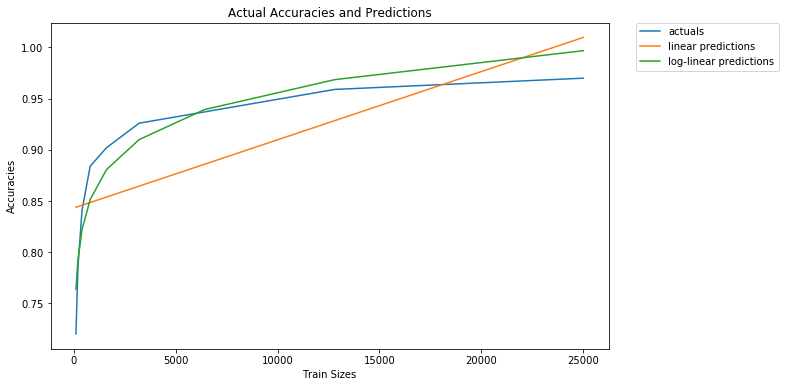

In [78]:
# Plot the actuals, linear predictions, and log-linear predictions
plt.figure(figsize=(10,6))
plt.title("Actual Accuracies and Predictions")
plt.xlabel("Train Sizes")
plt.ylabel("Accuracies")
plt.plot(train_sizes, accuracies, label="actuals");
plt.plot(train_sizes, preds, label="linear predictions");
plt.plot(train_sizes, log_preds, label="log-linear predictions");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

__ANSWER:__ _For train size 60,000, the linear model predicts an accuracy of 1.23. This is obviously unreasonable since accuracy cannot be higher than 1. The problem is that the growth in accuracy is not linear, in fact it is bound between 0 and 1. For a more reasonable prediction I performed a log-transformation on the x values as they seem to grow at a logarithmic rate. This model gives a prediction of 1.03 for a training size of 60,000. While this is still inaccurate it is obvious from the plot above that it is a much more reasoable estimate than 1.23._

_It may be even more fitting to use a logistic regression model which would force the accuracy outputs to be bounded between 0 and 1._

## Problem 5

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [79]:
def P5(train_X, train_y, dev_X, dev_y):
    """Fit a 1-NN classifier and output the confusion matrix
    along with the predictions and the the actual labels
    """
    
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_X, train_y)
    preds = clf.predict(dev_X)
    return confusion_matrix(dev_y, preds), preds, dev_y

conf_mat, preds, actuals = P5(mini_train_data, mini_train_labels, dev_data, dev_labels)

print(conf_mat)

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


The confusion matrix shown above indicates that most frequently, the 1-NN model mistakes 4's for 9's. Below I show a few examples of those which have been mislabeled.

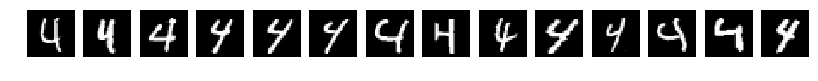

In [80]:
# Extract a few values from the dev_data that were 
# predicted to be 9 when in reality the value is 4
mislabeled = dev_data[np.where((preds==9) & (actuals==4))[0]]

# Use function P1 to plot the examples below
P1(mislabeled, num_examples=len(mislabeled))

## Problem 6

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

The following function is created to apply a blurring filter to the image data. 

In [81]:
# Create a function to blur the images in the input array

def blur_images(X,blur_filter):
    """This function takes an input of an array of images
    and a 3x3 weighted filter. It applies the filter to blur 
    the images in the MNIST data set.
    """
    
    # Create an array to store the results of the blur
    results = np.zeros((len(X),28*28))
    
    # Loop over each value in the 
    for k in range(len(X)):
        
        # Zero pad the image
        padded_img = np.pad(X[k].reshape(28,28),(1,),mode='constant')
        
        # Create an array to receive the new transformed images
        blurred_sample = np.zeros((28,28))
        
        # Convolve the filter over the image and store the values in an empty array
        for i, j in np.ndindex((28,28)):
            
            # Calculate the value of a single pixel given the applied filter
            blurred_sample[i,j] = np.sum(padded_img[i:i+3, j:j+3]*blur_filter)
            
        # Add the new array into the results dataset
        results[k,:] = blurred_sample.reshape(1,28*28)
        
    return results

Initiate a filter that will blur the images

In [82]:
# Create a filter
# The filter below weights the middle value slightly higher
# than the surrounding 8 pixels
blur_filter = np.array([[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]])

Blur the images in the dev_data and mini_train_data arrays

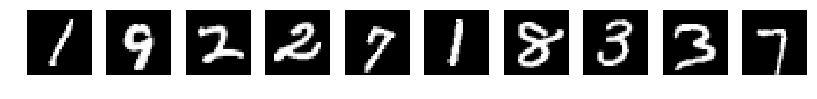

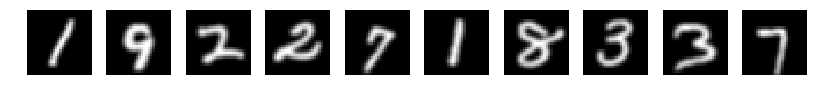

In [83]:
# Apply the blur filter to the mini_train_data
mini_train_blur = blur_images(mini_train_data, blur_filter)

# Apply the blur filter to the dev_data
dev_blur = blur_images(dev_data, blur_filter)

# Plot an example of the normal and blurred images
P1(mini_train_data[0:10])
P1(mini_train_blur[0:10])

Use a 1-NN to classify different combinations of the normal and blurred data.

In [84]:
def P6(train_X, train_blur, train_y, dev_X, dev_blur, dev_y):
    """
    This function takes normal and blurred data and gets
    accuracies for various combinations of train and test.
    """
    
    # Fit unproccessed train_data and unprocessed dev_data
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_X, train_y)
    preds = clf.predict(dev_X)
    acc = np.mean(preds==dev_y)
    print "With neither the training or the dev blurred we get an accuracy of {:.1%}".format(acc)
    
    # Fit proccessed train_data and unprocessed dev_data
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_blur, train_y)
    preds = clf.predict(dev_X)
    acc = np.mean(preds==dev_y)
    print "With just the train data blurred we get an accuracy of {:.1%}".format(acc)
    
    # Fit unproccessed train_data and processed dev_data
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_X, train_y)
    preds = clf.predict(dev_blur)
    acc = np.mean(preds==dev_y)
    print "With just the dev data blurred we get an accuracy of {:.1%}".format(acc)
    
    # Fit proccessed train_data and processed dev_data
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_blur, train_y)
    preds = clf.predict(dev_blur)
    acc = np.mean(preds==dev_y)
    print "With both training and dev blurred we get an accuracy of {:.1%}".format(acc)

P6(mini_train_data, mini_train_blur, mini_train_labels, dev_data, dev_blur, dev_labels)

With neither the training or the dev blurred we get an accuracy of 88.8%
With just the train data blurred we get an accuracy of 90.6%
With just the dev data blurred we get an accuracy of 87.6%
With both training and dev blurred we get an accuracy of 90.1%


__ANSWER:__ _The following accuracies are acheived when using different combinations of processed and unprocessed data. We get the best results when both the training and dev sets are blurred as shown below._

|  train_data |   dev_data  | accuracy |
|-------------|-------------|----------|
| unprocessed | unprocessed | __89.2%__|
| processed   | unprocessed | __91.3%__|
| unprocessed | processed   | __87.9%__|
| processed   | processed   | __92.1%__|


## Problem 7

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [117]:
# Create two functions that process the data for
# binary or multinomial models

def binarize(data):
    """This function maps each pixel to 0 or 1
    depending on whether its value is above or below 0.5
    """
    return (data>0.5).astype('int')

def categorize(data):
    """This function maps each pixel to 0, 1, or 2
    depending on which third of the spectrum the pixel 
    falls into.
    """
    return (1*data>0.333).astype('int') + (1*data>0.666).astype('int')
    
# Pre-process the feature values as binary 
mini_train_bin = binarize(mini_train_data)
train_bin = binarize(train_data)
dev_bin = binarize(dev_data)

# Pre-process the feature values as multinomial
mini_train_multi = categorize(mini_train_data)
train_multi = categorize(train_data)
dev_multi = categorize(dev_data)

In [118]:
def P7(train_X, train_y, dev_X, dev_y, thresholds='binary'):
    """ This value takes train and test data and fits
    either a Bernoulli or Multinomial Naive Bayes model
    depending on the value of the thresholds variable
    """
    
    # If the data is binary fit a BernoulliNB model
    if thresholds=='binary':
        clf = BernoulliNB()
        clf.fit(train_X, train_y)
        preds = clf.predict(dev_X)
        acc = np.mean(preds==dev_y)
        print "Accuracy with binary features: {:.1%}".format(acc)
    
    # If the data is multinomial fit a MultinomialNB model
    if thresholds=='multi':
        clf = MultinomialNB()
        clf.fit(train_X, train_y)
        preds = clf.predict(dev_X)
        acc = np.mean(preds == dev_y)
        print "Accuracy with multinomial features: {:.1%}".format(acc)

# Fit the binary data with a Bernoulli Naive Bayes
P7(mini_train_bin, mini_train_labels, dev_bin, dev_labels, thresholds='binary')

# Fit the multinomial data with a Multinomial Naive Bayes
P7(mini_train_multi, mini_train_labels, dev_multi, dev_labels, thresholds='multi')

Accuracy with binary features: 81.5%
Accuracy with multinomial features: 80.3%


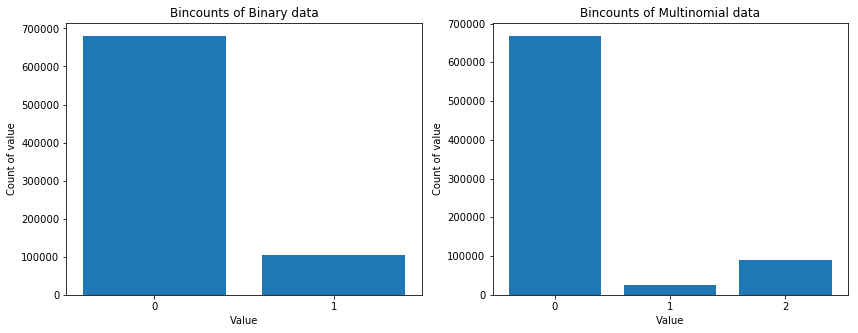

In [119]:
# Plot the frequency of values in the binary and multinomial arrays

plt.figure(figsize=(14,5))

# Plot the binary array value frequencies
plt.subplot(121)
plt.title("Bincounts of Binary data")
plt.ylabel("Count of value")
plt.xlabel("Value")
plt.xticks(np.unique(mini_train_bin))
plt.bar(np.unique(mini_train_bin), np.bincount(mini_train_bin.flatten()));

# Plot the multinomial array value frequencies
plt.subplot(122)
plt.title("Bincounts of Multinomial data")
plt.ylabel("Count of value")
plt.xlabel("Value")
plt.xticks(np.unique(mini_train_multi))
plt.bar(np.unique(mini_train_multi), np.bincount(mini_train_multi.flatten()));

__ANSWER:__ _The BernoulliNB model performs slightly better than the MultinomialNB model. This could be due to the fact that most of the values in the data are either 0 or 1. We can see from the charts above, that the values falling between 0.33 and 0.66 don't seem to be very large. Perhaps there isn't enough data in the specified range to make the multinomial model useful. _

## Problem 8

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [120]:
def P8(alphas, train_X, train_y):
    """This function accepts a list of alpha values,
    and training and test data. It then uses grid search
    to find the optimal alpha value for the data.
    """
    
    # Instantiate a BernoulliNB classifier
    nbc = BernoulliNB()
    
    # Create a grid search object to search over alphas
    clf = GridSearchCV(nbc, alphas)
    
    # Output the results of the fit model
    return clf.fit(train_X, train_y)

# Set up an alpha parameters dictionary
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# Apply the grid search function on the data for the various alpha parameters
nb = P8(alphas, mini_train_bin, mini_train_labels)

C:\Users\danvo\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\danvo\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [121]:
print "The best parameter value for this model is", nb.best_params_['alpha']
print
print "The best score is", nb.best_score_
print
print "When alpha=0, the score is", nb.grid_scores_[0][1]

The best parameter value for this model is 0.01

The best score is 0.821

When alpha=0, the score is 0.092


__ANSWER:__ _The best alpha parameter for the BernoulliNB is 0.01 which yeilds a score of 0.821. When alpha=0 the score is significantly worse, because there is no Laplace smoothing. When alpha=0 the classifier may not generalize well to new data as there may be no instances of a particular X value given the Y label. For each of these cases, $P(X_i=x_i|Y=y)=0$. As a result, any new information that had not been seen in the training data is essentially ignored._ 

## Problem 9

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

We start by training a Gaussian Naive Bayes Classifier on the mini_train_data

In [131]:
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
preds = clf.predict(dev_data)
print "The accuracy of the Gaussian Naive Bayes is", np.mean(preds==dev_labels)

The accuracy of the Gaussian Naive Bayes is 0.621


The accuracy is significantly lower than the Bernoulli. It's important to note that from the data many of the values are either 1 or 0 which is why the Bernoulli classifier performed so much better than the Multinomial. We can see this illustrated in the chart below.

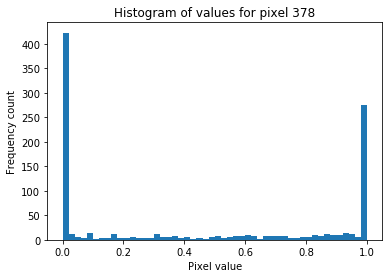

In [133]:
plt.title("Histogram of values for pixel 378")
plt.ylabel("Frequency count")
plt.xlabel("Pixel value")
plt.hist(mini_train_data[:,378],bins=50);
plt.show()

For a Gaussian to be effective it needs more of the features to fall between 0 and 1. To do this, we can add noise to the data using random draws from a Gaussian distribution. The function for this is shown below.

In [122]:
def add_noise(data):
    """This function takes and array
    and adds Gaussian noise to the images.
    """
    # Make a copy of the data
    data_noise = np.copy(data)
    
    # Add noise to the model according to a gaussian distribution
    data_noise += np.random.normal(0,0.2,data_noise.shape)
    
    # Normalize the noisy dataset between 0 and 1. 
    data_noise = (data_noise - np.min(data_noise)) / (np.max(data_noise) - np.min(data_noise))
    
    return data_noise

Now we preprocess the data using the `add_noise()` function.

In [135]:
# Preprocess the mini_train_data and dev_data
mini_train_noise = add_noise(mini_train_data)
dev_noise = add_noise(dev_data)

To see the impact of this lets plot the distribution of values for the same point again.

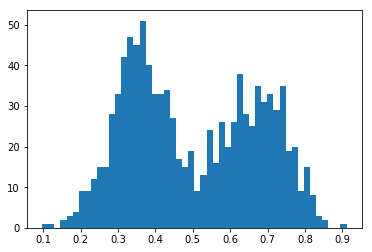

In [136]:
plt.hist(mini_train_noise[:,378],bins=50);
plt.show()

We can see below what the addition of noise does to the images.

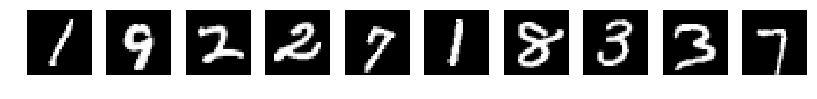

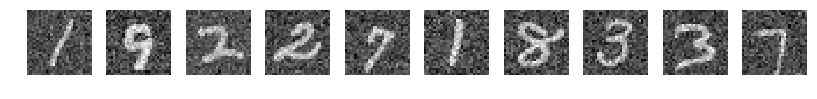

In [126]:
# Plot examples of normal and noisy data from mini_train_data
P1(mini_train_data[0:10],10)
P1(mini_train_noise[0:10],10)

Finally we build a function that takes the normal data along with the noisy data and compares the accuracy for each.

In [140]:
def P9(train_X, train_noise, train_y, dev_X, dev_noise, dev_y):
    
    # Fit a GaussianNB to the normal data
    clf = GaussianNB()
    clf.fit(train_X, train_y)
    preds = clf.predict(dev_X)
    print "The accuracy of the normal Gaussian Naive Bayes is", np.mean(preds==dev_y)
    
    # Fit a GaussianNB to the normal data
    clf_noise = GaussianNB()
    clf_noise.fit(train_noise, train_y)
    preds = clf_noise.predict(dev_noise)
    print "The accuracy of the normal Gaussian Naive Bayes is", np.mean(preds==dev_y)

    return clf, clf_noise

gnb, gnb_noise = P9(mini_train_data, mini_train_noise, mini_train_labels, dev_data, dev_noise, dev_labels)

The accuracy of the normal Gaussian Naive Bayes is 0.621
The accuracy of the normal Gaussian Naive Bayes is 0.81


__ANSWER:__ _As we can see, adding the noise made the GaussianNB model nearly as accurate as the Bernoulli model. The Bernoulli model performed so much better on the normal data, because it was essentially binary in nature to begin with._

## Problem 10

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

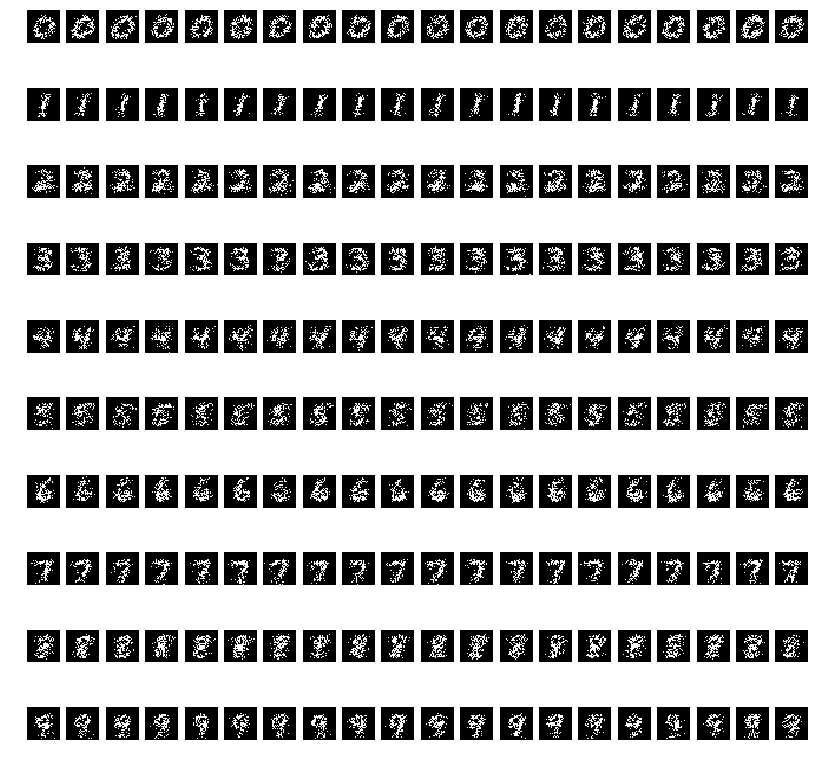

In [343]:
def P10(num_examples, train_X, train_y):
    """This function takes an input array and fits a BernoulliNB model to it. 
    It then generates random variables and plots the values where the feature
    probability is higher than the generated value. It plots the specified 
    number of examples for each digit.
    """
    # Instantiate a BernoulliNB model
    clf = BernoulliNB(alpha=0.01)
    
    # Fit to the input data
    clf.fit(train_X, train_y)
    
    # Find the probabilities for each pixel given the label
    probs = np.exp(clf.feature_log_prob_)
    
    # Repeat the probabilities for num_examples times
    probs = np.repeat(probs, num_examples, axis=0)
    
    # Generate a random number array of the same size as probs
    rands = np.random.rand(probs.size).reshape(probs.shape)
    
    # If the random number is greater than the probability return 1
    gen_digits = (probs>rands).astype(int)
    
    # Plot all the images in the generated dataset
    P1(gen_digits, num_examples)

# Use the function to generate 20 samples of the training 
P10(20, mini_train_bin, mini_train_labels)

__ANSWER:__ _The method above generates something similar to the normal digits that we saw in the plots earlier. Obviously since they are generated randomly there is a considerable amount of noise in the data generated images._

## Problem 11

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
def P11(train_X, train_y, dev_X, dev_y, buckets, correct, total):
    """This function fits a BernoulliNB and returns the accuracy
    for different thresholds of predicted probabilities.
    """
    
    # Instantiate a BernoulliNB model
    clf = BernoulliNB(alpha=0.01)
    
    # fit the BernoulliNB
    clf.fit(train_X, train_y)
    
    # Get the predictions
    preds = clf.predict(dev_X)
    
    # Find the probability of the predicted class
    max_probs = np.max(clf.predict_proba(dev_X), axis=1)
    
    # Create an array of the correct predictions
    correct_preds = (preds == dev_y).astype('float')
    
    # Loop over each bucket
    for b in range(len(buckets)):
        
        # Count the number of total predictions that fall into the bucket
        total[b] = np.size(np.where(max_probs >= buckets[b]))
        
        # Count the number of correct predictions that fall into the bucket
        correct[b] = sum(correct_preds[np.where(max_probs>=buckets[b])])
    
    # return the correct and total 
    return correct, total
        

In [50]:
# Set up the buckets
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

# Get the number of correct and total counts for each threshold
correct, total = P11(mini_train_bin, mini_train_labels, dev_data, dev_labels, buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.793
p(pred) <= 0.9000000000000    total = 973    accuracy = 0.805
p(pred) <= 0.9990000000000    total = 907    accuracy = 0.829
p(pred) <= 0.9999900000000    total = 841    accuracy = 0.851
p(pred) <= 0.9999999000000    total = 784    accuracy = 0.867
p(pred) <= 0.9999999990000    total = 734    accuracy = 0.890
p(pred) <= 0.9999999999900    total = 686    accuracy = 0.905
p(pred) <= 0.9999999999999    total = 632    accuracy = 0.919
p(pred) <= 1.0000000000000    total = 602    accuracy = 0.930


__ANSWER:__ _The classifier seems to be weakly calibrated. As the threshold value goes up the accuracy also increases which shows a positive correlation. However, since the accuracy is below the prediction probabilities we cannot say that it is a strongly calibrated classifier._

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [295]:
def block_means(data, blocks):
    
    results = np.zeros((len(data),blocks**2))
    
    stack = data.reshape(len(data),28,28)
    step = 28/blocks

    block = 0

    for i, j in product(range(0,28,step), range(0,28,step)):

        results[:,block] = np.sum(stack[:,i:i+step,j:j+step], axis=(1,2))
        block+=1
        
    return np.concatenate((results,data), axis=1)

mini_train_aug = block_means(mini_train_data, 4)


In [339]:
def array_means(data):
    v_means = np.mean(data.reshape(len(data),28,28), axis=1)
    h_means = np.mean(data.reshape(len(data),28,28), axis=2)
    return np.concatenate((data, v_means, h_means), axis=1)

In [350]:
def P12(train_X, train_y, dev_X, dev_y):
    
    train_aug = array_means(train_X)
    
    dev_aug = array_means(dev_X)
    
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(train_aug, train_y)
    preds = clf.predict(dev_aug)
    
    return np.mean(preds == dev_y)
    

P12(mini_train_data, mini_train_labels, dev_data, dev_labels)

0.872